In [ ]:
#ニューラルネットワーク2回目
#最高精度

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers


df=pd.read_excel('myoken0.xlsx', index_col='日時')
df=df[['損失水頭_3号', 'ろ過速度h', '処理水濁度_1系', '処理水濁度_2系', 'PAC注入量34', '水温U3', 'ろ過継続時間']]
df=df.interpolate(method='linear') #補間 #linear, time, index, values, nearest, zero, slinear, quadratic, cubic, barycentric, krogh, polynomial, spline, piecewise_polynomial, pchip #linear:値を等間隔に扱う、time:指定された長さの間隔を補間、index/values:インデックスの実際の数値、pad:既存の値を利用 #datetime型のindexの場合、indexが良い
df=df.rolling(7).mean() #移動平均 #Trueで中央に値を配置
df=df.dropna() #欠損値除去

x=df[['ろ過速度h', '処理水濁度_1系', '処理水濁度_2系', 'PAC注入量34', '水温U3', 'ろ過継続時間']] #入力値
y=df[['損失水頭_3号']] #出力値
x=(x-x.min())/(x.max()-x.min()) #正規化
#データの分割
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=False)

#https://keras.io/api/callbacks/reduce_lr_on_plateau/
def step_decay(epoch):
    a=0.001
    if epoch >=25:a=0.0005
    if epoch >=50:a=0.0001
    if epoch >=75:a=0.00005
    return a
lr_decay=LearningRateScheduler(step_decay)




#バッチ正規化
#https://qiita.com/shu_marubo/items/3ca66b18ff48602605d7
#https://qitta.com/hara_tatsu/items/b7423e90574cf7730978
#https://qitta.com/kakiuchis/items/3e727228dd770c240c5d
#ディープラーニングの本

#acti='relu'
n_hidden=256


nn=Sequential()
#入力層
nn.add(Dense(6, input_dim=6, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))#0.3か0.5が一般的に選ばれる
#中間層
    #10
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))
nn.add(Dense(n_hidden, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))


    
#出力層
nn.add(Dense(1, kernel_initializer='he_normal', activation='linear'))

#モデルの学習
optimizer=Adam(learning_rate=0.001)
nn.compile(optimizer=optimizer,
            loss='mean_squared_error')
           #metrics=['accuracy'])
#optimaizer最適化手法(lbfgs, sgd, adam)
#learning_rate学習率（0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001）
#loss損失関数(mean_squared_error, cross_entropy_error, ミニバッチ学習, sparse_categorical_crossentropy)
#metrics訓練時に監視する指標

#EarlyStopping過学習を防ぐための関数
es=EarlyStopping(monitor='loss',
                 patience=10,
                 verbose=1)

hist=nn.fit(x_train, y_train,
                callbacks=[es, lr_decay],
                epochs=100,
                batch_size=32,
                verbose=2)
#batch_size:2のn乗を使うのが一般的
#verbose:ログ出力の指定　１はログあり、２はログなし
#validation_data:検証データ

Epoch 1/100
438/438 - 4s - loss: 0.5062 - lr: 0.0010 - 4s/epoch - 9ms/step
Epoch 2/100
438/438 - 2s - loss: 0.1534 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 3/100
438/438 - 2s - loss: 0.1060 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 4/100
438/438 - 2s - loss: 0.0945 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 5/100
438/438 - 2s - loss: 0.0833 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 6/100
438/438 - 2s - loss: 0.0789 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 7/100
438/438 - 2s - loss: 0.0748 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 8/100
438/438 - 2s - loss: 0.0691 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 9/100
438/438 - 2s - loss: 0.0646 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 10/100
438/438 - 2s - loss: 0.0599 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 11/100
438/438 - 2s - loss: 0.0557 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 12/100
438/438 - 2s - loss: 0.0529 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 13/100
438/438 - 2s - loss: 0.0506 - lr: 0.0010 - 2s/epoch - 4ms/step
Epoch 14/100
438/438 

In [2]:
open('nn_2.json', "w").write(nn.to_json())
nn.save_weights('nn_2.h5')

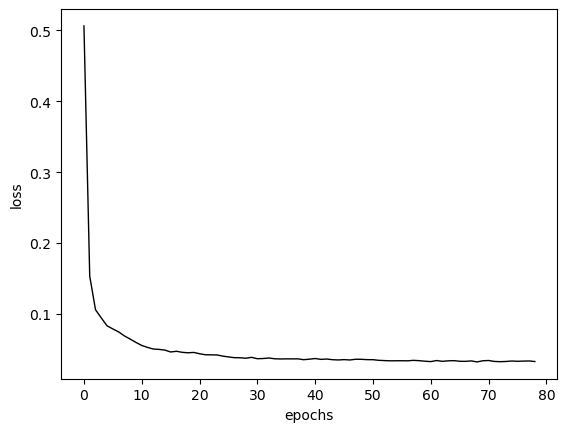

110/110 [==============================] - 0s 1ms/step
RMSE 学習: 0.23, テスト: 0.21
R^2 学習: 0.72, テスト: 0.82


In [3]:

#検証データの誤差の可視化
#ディープラーニングの本
loss=hist.history['loss']
fig=plt.figure()
plt.plot(range(len(loss)), loss, color='black', linewidth=1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


#決定係数
from sklearn.metrics import r2_score
#RMSE
from sklearn.metrics import mean_squared_error



#予測値(学習データ)
y_train_yosoku=nn.predict(x_train)
#予測値(テストデータ)
y_test_yosoku=nn.predict(x_test)

#RMSE
print('RMSE 学習: %.2f, テスト: %.2f' %(
    mean_squared_error(y_train, y_train_yosoku, squared=False),
    mean_squared_error(y_test, y_test_yosoku, squared=False)
))

#決定係数
print('R^2 学習: %.2f, テスト: %.2f' %(
    r2_score(y_train, y_train_yosoku),
    r2_score(y_test, y_test_yosoku)
))


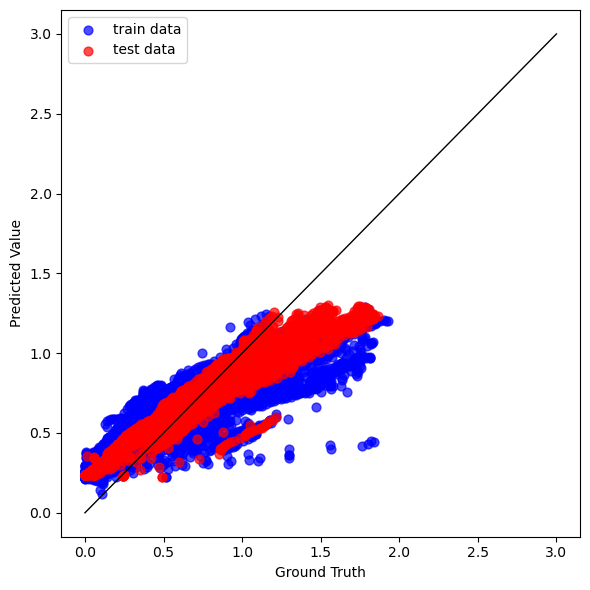

In [4]:
plt.figure(figsize=(6, 6))
plt.plot([0, 3], [0, 3], linewidth=1, c='black')
#予測値と実測値　学習データ
plt.scatter(y_train,
            y_train_yosoku,
            c='blue',
            marker='o',
            s=40,
            alpha=0.7,
            label='train data')

#予測値と実測値　テストデータ
plt.scatter(y_test,
            y_test_yosoku,
            c='red',
            marker='o',
            s=40,
            alpha=0.7,
            label='test data')

#グラフ書式
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

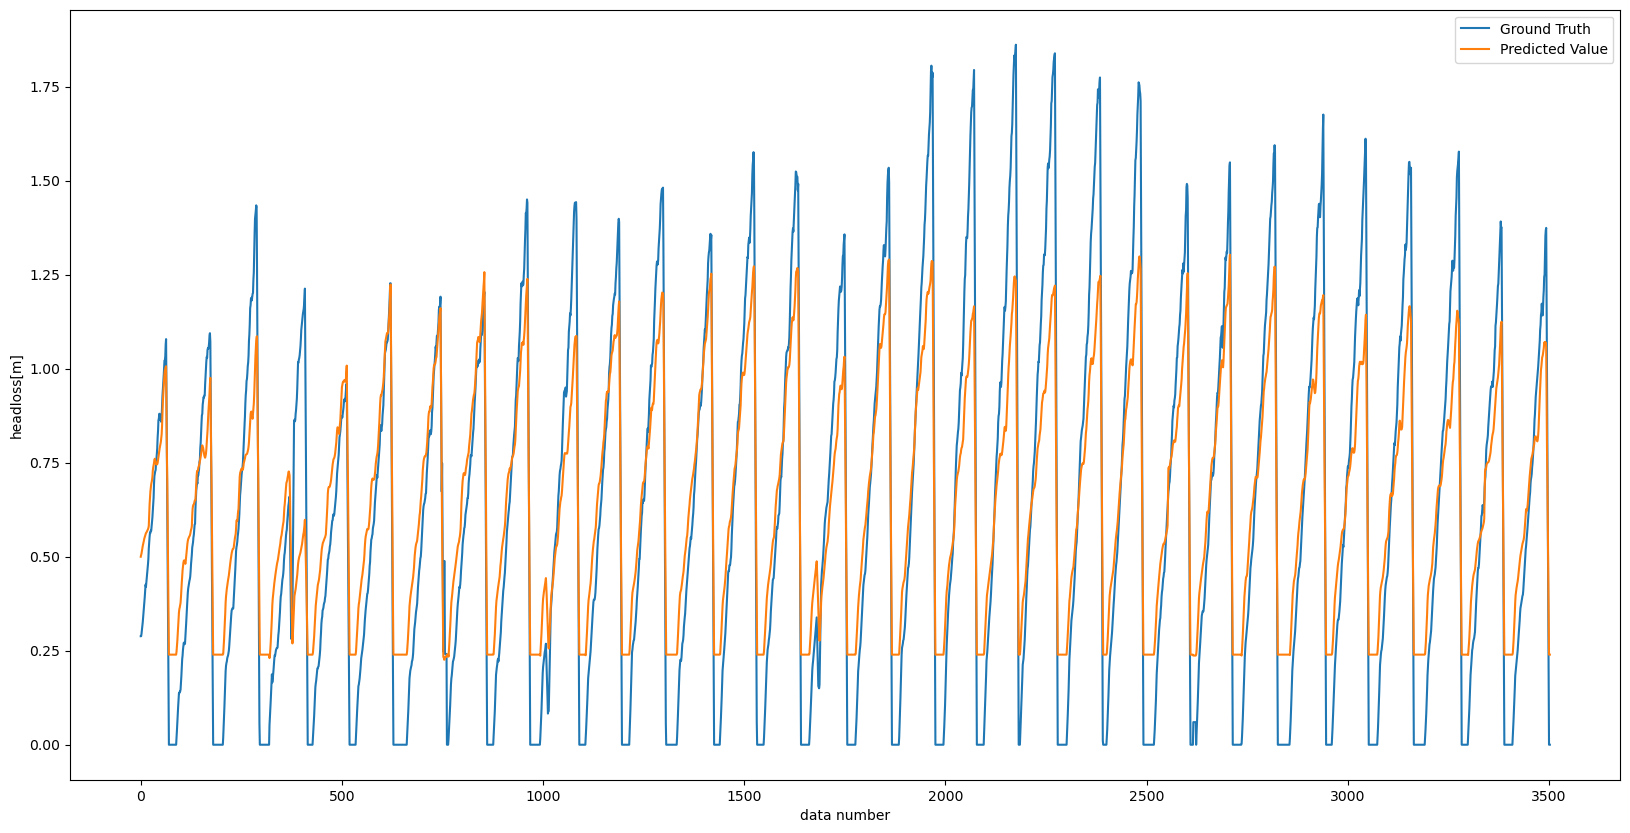

In [7]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label="Ground Truth")
plt.plot(y_test_yosoku, label="Predicted Value")
plt.legend()
plt.xlabel('data number')
plt.ylabel('headloss[m]')
plt.show()

In [16]:
#csvファイルの中身
predict_df = pd.DataFrame()
predict_df['test'] = y_test
predict_df['pred'] = y_test_yosoku

#csvファイルに保存
predict_df.to_csv('./nn_2.csv', index=True)